In [1]:
import numpy as np
from numpy.lib import recfunctions as rf
from pathlib import Path
from astropy.table import Table, vstack
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

In [3]:
cd '/Users/j.mccleary/Research/'

/Users/j.mccleary/Research


In [10]:
climates = glob.glob('climate*csv')
climates

['climate_normals_Houston.csv',
 'climate_normals_Baltimore.csv',
 'climate_normals_Atlanta.csv']

In [12]:
atl = Table.read('climate_normals_Atlanta.csv', format='ascii.csv')
bmore = Table.read('climate_normals_Baltimore.csv', format='ascii.csv')
houst = Table.read('climate_normals_Houston.csv', format='ascii.csv')
print(len(bmore), len(houst))
atl.info()

8760 8760
<Table length=8760>
           name            dtype     class     n_bad
------------------------- ------- ------------ -----
                  STATION   str11       Column     0
                     NAME   str33       Column     0
                 LATITUDE float64       Column     0
                LONGITUDE float64       Column     0
                ELEVATION float64       Column     0
                     DATE   str14       Column     0
                    month   int64       Column     0
                      day   int64       Column     0
                     hour   int64       Column     0
          HLY-TEMP-NORMAL float64       Column     0
meas_flag_HLY-TEMP-NORMAL   int64 MaskedColumn  8760
comp_flag_HLY-TEMP-NORMAL    str1       Column     0
    years_HLY-TEMP-NORMAL   int64       Column     0
          HLY-TEMP-10PCTL float64       Column     0
meas_flag_HLY-TEMP-10PCTL   int64 MaskedColumn  8760
comp_flag_HLY-TEMP-10PCTL    str1       Column     0
    years_HLY-TE

In [13]:
bmore[0:5]

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,month,day,hour,HLY-TEMP-NORMAL,meas_flag_HLY-TEMP-NORMAL,comp_flag_HLY-TEMP-NORMAL,years_HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,meas_flag_HLY-TEMP-10PCTL,comp_flag_HLY-TEMP-10PCTL,years_HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,meas_flag_HLY-TEMP-90PCTL,comp_flag_HLY-TEMP-90PCTL,years_HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,meas_flag_HLY-DEWP-NORMAL,comp_flag_HLY-DEWP-NORMAL,years_HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,meas_flag_HLY-DEWP-10PCTL,comp_flag_HLY-DEWP-10PCTL,years_HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,meas_flag_HLY-DEWP-90PCTL,comp_flag_HLY-DEWP-90PCTL,years_HLY-DEWP-90PCTL,HLY-PRES-NORMAL,meas_flag_HLY-PRES-NORMAL,comp_flag_HLY-PRES-NORMAL,years_HLY-PRES-NORMAL,HLY-PRES-10PCTL,meas_flag_HLY-PRES-10PCTL,comp_flag_HLY-PRES-10PCTL,years_HLY-PRES-10PCTL,HLY-PRES-90PCTL,meas_flag_HLY-PRES-90PCTL,comp_flag_HLY-PRES-90PCTL,years_HLY-PRES-90PCTL,HLY-CLDH-NORMAL,meas_flag_HLY-CLDH-NORMAL,comp_flag_HLY-CLDH-NORMAL,years_HLY-CLDH-NORMAL,HLY-HTDH-NORMAL,meas_flag_HLY-HTDH-NORMAL,comp_flag_HLY-HTDH-NORMAL,years_HLY-HTDH-NORMAL,HLY-CLOD-PCTCLR,meas_flag_HLY-CLOD-PCTCLR,comp_flag_HLY-CLOD-PCTCLR,years_HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,meas_flag_HLY-CLOD-PCTFEW,comp_flag_HLY-CLOD-PCTFEW,years_HLY-CLOD-PCTFEW,HLY-CLOD-PCTSCT,meas_flag_HLY-CLOD-PCTSCT,comp_flag_HLY-CLOD-PCTSCT,years_HLY-CLOD-PCTSCT,HLY-CLOD-PCTBKN,meas_flag_HLY-CLOD-PCTBKN,comp_flag_HLY-CLOD-PCTBKN,years_HLY-CLOD-PCTBKN,HLY-CLOD-PCTOVC,meas_flag_HLY-CLOD-PCTOVC,comp_flag_HLY-CLOD-PCTOVC,years_HLY-CLOD-PCTOVC,HLY-HIDX-NORMAL,meas_flag_HLY-HIDX-NORMAL,comp_flag_HLY-HIDX-NORMAL,years_HLY-HIDX-NORMAL,HLY-WCHL-NORMAL,meas_flag_HLY-WCHL-NORMAL,comp_flag_HLY-WCHL-NORMAL,years_HLY-WCHL-NORMAL,HLY-WIND-AVGSPD,meas_flag_HLY-WIND-AVGSPD,comp_flag_HLY-WIND-AVGSPD,years_HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,meas_flag_HLY-WIND-PCTCLM,comp_flag_HLY-WIND-PCTCLM,years_HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,meas_flag_HLY-WIND-VCTDIR,comp_flag_HLY-WIND-VCTDIR,years_HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,meas_flag_HLY-WIND-VCTSPD,comp_flag_HLY-WIND-VCTSPD,years_HLY-WIND-VCTSPD,HLY-WIND-1STDIR,meas_flag_HLY-WIND-1STDIR,comp_flag_HLY-WIND-1STDIR,years_HLY-WIND-1STDIR,HLY-WIND-1STPCT,meas_flag_HLY-WIND-1STPCT,comp_flag_HLY-WIND-1STPCT,years_HLY-WIND-1STPCT,HLY-WIND-2NDDIR,meas_flag_HLY-WIND-2NDDIR,comp_flag_HLY-WIND-2NDDIR,years_HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,meas_flag_HLY-WIND-2NDPCT,comp_flag_HLY-WIND-2NDPCT,years_HLY-WIND-2NDPCT
str11,str29,float64,float64,float64,str14,int64,int64,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64
USW00093721,"BALTIMORE WASH INTL AP, MD US",39.1667,-76.6833,47.5,01-01T00:00:00,1,1,0,33.9,--,S,30,21.9,--,S,30,46.9,--,S,30,25.3,--,S,30,9.0,--,S,30,43.0,--,S,30,1019.2,--,S,30,1007.6,--,S,30,1030.6,--,S,30,0.0,--,S,30,31.1,--,S,30,24.1,--,S,30,15.2,--,S,30,10.5,--,S,30,16.0,--,S,30,34.3,--,S,30,33.9,--,S,30,29.4,--,S,30,6.0,--,S,30,26.2,--,S,30,292,--,S,30,3.2,--,S,30,7,--,S,30,25.2,--,S,30,8,--,S,30,14.7,--,S,30
USW00093721,"BALTIMORE WASH INTL AP, MD US",39.1667,-76.6833,47.5,01-01T01:00:00,1,1,1,33.4,--,S,30,21.0,--,S,30,46.0,--,S,30,25.2,--,S,30,8.1,--,S,30,43.0,--,S,30,1018.9,--,S,30,1007.0,--,S,30,1030.5,--,S,30,0.0,--,S,30,31.6,--,S,30,20.6,--,S,30,13.9,--,S,30,8.8,--,S,30,15.1,--,S,30,41.5,--,S,30,33.4,--,S,30,29.1,--,S,30,5.8,--,S,30,30.3,--,S,30,292,--,S,30,3.2,--,S,30,7,--,S,30,22.3,--,S,30,8,--,S,30,13.9,--,S,30
USW00093721,"BALTIMORE WASH INTL AP, MD US",39.1667,-76.6833,4

Text(0.5, 0, 'Date index')

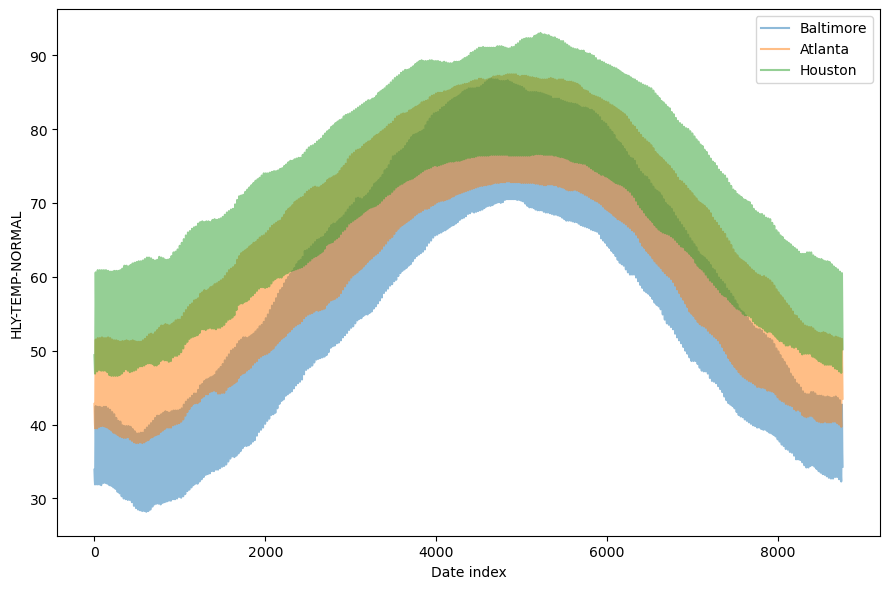

In [22]:
key = 'HLY-TEMP-NORMAL'

fig, ax = plt.subplots(1,1, figsize=(9,6), tight_layout=True)

ax.plot(np.arange(len(bmore)), bmore[key], ls='-', label='Baltimore', alpha=0.5)
ax.plot(np.arange(len(atl)), atl[key], ls='-', label='Atlanta', alpha=0.5)
ax.plot(np.arange(len(houst)), houst[key], ls='-', label='Houston', alpha=0.5)

ax.legend(markerscale=20)
ax.set_ylabel(f'{key}')
ax.set_xlabel('Date index')


Text(0.5, 0, 'Date index')

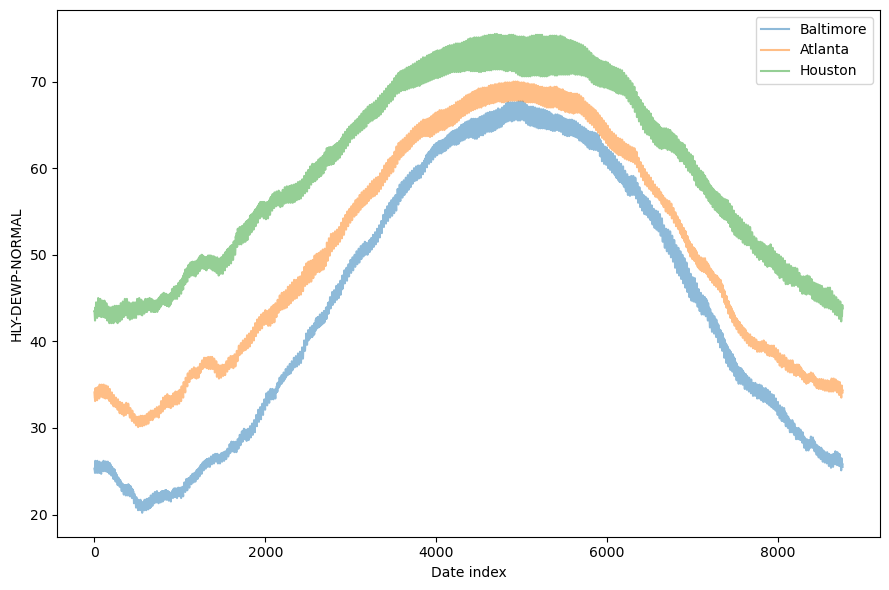

In [23]:
key = 'HLY-DEWP-NORMAL'

fig, ax = plt.subplots(1,1, figsize=(9,6), tight_layout=True)

ax.plot(np.arange(len(bmore)), bmore[key], ls='-', label='Baltimore', alpha=0.5)
ax.plot(np.arange(len(atl)), atl[key], ls='-', label='Atlanta', alpha=0.5)
ax.plot(np.arange(len(houst)), houst[key], ls='-', label='Houston', alpha=0.5)

ax.legend(markerscale=20)
ax.set_ylabel(f'{key}')
ax.set_xlabel('Date index')


Text(0.5, 0, 'HLY-TEMP-NORMAL')

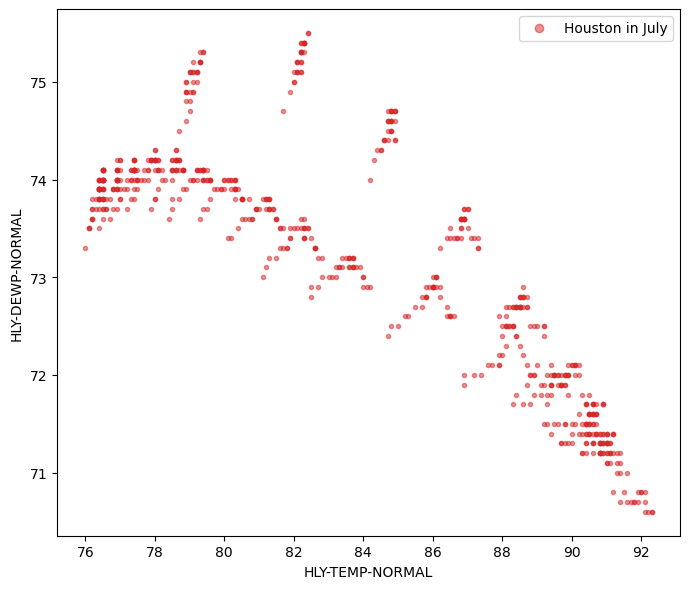

In [40]:
ykey = 'HLY-DEWP-NORMAL'
xkey = 'HLY-TEMP-NORMAL'

jul = (houst['month']==7)

fig, ax = plt.subplots(1,1, figsize=(7,6), tight_layout=True)
ax.plot(houst_july[xkey], houst_july[ykey],'.', label='Houston in July', color='tab:red', alpha=0.5)
ax.legend(markerscale=2)
ax.set_ylabel(f'{ykey}')
ax.set_xlabel(f'{xkey}')


In [38]:
houst_july = houst[jul]
houst_july.sort(xkey)
houst_july

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,month,day,hour,HLY-TEMP-NORMAL,meas_flag_HLY-TEMP-NORMAL,comp_flag_HLY-TEMP-NORMAL,years_HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,meas_flag_HLY-TEMP-10PCTL,comp_flag_HLY-TEMP-10PCTL,years_HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,meas_flag_HLY-TEMP-90PCTL,comp_flag_HLY-TEMP-90PCTL,years_HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,meas_flag_HLY-DEWP-NORMAL,comp_flag_HLY-DEWP-NORMAL,years_HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,meas_flag_HLY-DEWP-10PCTL,comp_flag_HLY-DEWP-10PCTL,years_HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,meas_flag_HLY-DEWP-90PCTL,comp_flag_HLY-DEWP-90PCTL,years_HLY-DEWP-90PCTL,HLY-PRES-NORMAL,meas_flag_HLY-PRES-NORMAL,comp_flag_HLY-PRES-NORMAL,years_HLY-PRES-NORMAL,HLY-PRES-10PCTL,meas_flag_HLY-PRES-10PCTL,comp_flag_HLY-PRES-10PCTL,years_HLY-PRES-10PCTL,HLY-PRES-90PCTL,meas_flag_HLY-PRES-90PCTL,comp_flag_HLY-PRES-90PCTL,years_HLY-PRES-90PCTL,HLY-CLDH-NORMAL,meas_flag_HLY-CLDH-NORMAL,comp_flag_HLY-CLDH-NORMAL,years_HLY-CLDH-NORMAL,HLY-HTDH-NORMAL,meas_flag_HLY-HTDH-NORMAL,comp_flag_HLY-HTDH-NORMAL,years_HLY-HTDH-NORMAL,HLY-CLOD-PCTCLR,meas_flag_HLY-CLOD-PCTCLR,comp_flag_HLY-CLOD-PCTCLR,years_HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,meas_flag_HLY-CLOD-PCTFEW,comp_flag_HLY-CLOD-PCTFEW,years_HLY-CLOD-PCTFEW,HLY-CLOD-PCTSCT,meas_flag_HLY-CLOD-PCTSCT,comp_flag_HLY-CLOD-PCTSCT,years_HLY-CLOD-PCTSCT,HLY-CLOD-PCTBKN,meas_flag_HLY-CLOD-PCTBKN,comp_flag_HLY-CLOD-PCTBKN,years_HLY-CLOD-PCTBKN,HLY-CLOD-PCTOVC,meas_flag_HLY-CLOD-PCTOVC,comp_flag_HLY-CLOD-PCTOVC,years_HLY-CLOD-PCTOVC,HLY-HIDX-NORMAL,meas_flag_HLY-HIDX-NORMAL,comp_flag_HLY-HIDX-NORMAL,years_HLY-HIDX-NORMAL,HLY-WCHL-NORMAL,meas_flag_HLY-WCHL-NORMAL,comp_flag_HLY-WCHL-NORMAL,years_HLY-WCHL-NORMAL,HLY-WIND-AVGSPD,meas_flag_HLY-WIND-AVGSPD,comp_flag_HLY-WIND-AVGSPD,years_HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,meas_flag_HLY-WIND-PCTCLM,comp_flag_HLY-WIND-PCTCLM,years_HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,meas_flag_HLY-WIND-VCTDIR,comp_flag_HLY-WIND-VCTDIR,years_HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,meas_flag_HLY-WIND-VCTSPD,comp_flag_HLY-WIND-VCTSPD,years_HLY-WIND-VCTSPD,HLY-WIND-1STDIR,meas_flag_HLY-WIND-1STDIR,comp_flag_HLY-WIND-1STDIR,years_HLY-WIND-1STDIR,HLY-WIND-1STPCT,meas_flag_HLY-WIND-1STPCT,comp_flag_HLY-WIND-1STPCT,years_HLY-WIND-1STPCT,HLY-WIND-2NDDIR,meas_flag_HLY-WIND-2NDDIR,comp_flag_HLY-WIND-2NDDIR,years_HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,meas_flag_HLY-WIND-2NDPCT,comp_flag_HLY-WIND-2NDPCT,years_HLY-WIND-2NDPCT
str11,str27,float64,float64,int64,str14,int64,int64,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,07-01T05:00:00,7,1,5,76.0,--,S,30,72.0,--,S,30,80.1,--,S,30,73.3,--,S,30,70.0,--,S,30,77.0,--,S,30,1015.0,--,S,30,1011.4,--,S,30,1018.2,--,S,30,11.0,--,S,30,0.0,--,S,30,6.9,--,S,30,23.2,--,S,30,35.6,--,S,30,23.7,--,S,30,10.6,--,S,30,78.4,--,S,30,76.0,--,S,30,2.7,--,S,30,52.2,--,S,30,146,--,S,30,0.9,--,S,30,5,--,S,30,16.7,--,S,30,2,--,S,30,8.0,--,S,30
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,07-01T06:00:00,7,1,6,76.1,--,S,30,72.0,--,S,30,80.1,--,S,30,73.5,--,S,30,70.0,--,S,30,77.0,--,S,30,1015.4,--,S,30,1011.6,--,S,30,1018.6,--,S,30,11.1,--,S,30,0.0,--,S,30,6.8,--,S,30,17.9,--,S,30,34.0,--,S,30,29.4,--,S,30,11.9,--,S,30,78.5,--,S,30,76.1,--,S,30,3.2,--,S,30,43.0,--,S,30,139,--,S,30,1.0,--,S,30,5,--,S,30,19.1,--,S,30,1,--,S,30,9.1,--,S,30
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,07-03T05:00:00,7,3,5,7

In [30]:
houst[-10:]

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,month,day,hour,HLY-TEMP-NORMAL,meas_flag_HLY-TEMP-NORMAL,comp_flag_HLY-TEMP-NORMAL,years_HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,meas_flag_HLY-TEMP-10PCTL,comp_flag_HLY-TEMP-10PCTL,years_HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,meas_flag_HLY-TEMP-90PCTL,comp_flag_HLY-TEMP-90PCTL,years_HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,meas_flag_HLY-DEWP-NORMAL,comp_flag_HLY-DEWP-NORMAL,years_HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,meas_flag_HLY-DEWP-10PCTL,comp_flag_HLY-DEWP-10PCTL,years_HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,meas_flag_HLY-DEWP-90PCTL,comp_flag_HLY-DEWP-90PCTL,years_HLY-DEWP-90PCTL,HLY-PRES-NORMAL,meas_flag_HLY-PRES-NORMAL,comp_flag_HLY-PRES-NORMAL,years_HLY-PRES-NORMAL,HLY-PRES-10PCTL,meas_flag_HLY-PRES-10PCTL,comp_flag_HLY-PRES-10PCTL,years_HLY-PRES-10PCTL,HLY-PRES-90PCTL,meas_flag_HLY-PRES-90PCTL,comp_flag_HLY-PRES-90PCTL,years_HLY-PRES-90PCTL,HLY-CLDH-NORMAL,meas_flag_HLY-CLDH-NORMAL,comp_flag_HLY-CLDH-NORMAL,years_HLY-CLDH-NORMAL,HLY-HTDH-NORMAL,meas_flag_HLY-HTDH-NORMAL,comp_flag_HLY-HTDH-NORMAL,years_HLY-HTDH-NORMAL,HLY-CLOD-PCTCLR,meas_flag_HLY-CLOD-PCTCLR,comp_flag_HLY-CLOD-PCTCLR,years_HLY-CLOD-PCTCLR,HLY-CLOD-PCTFEW,meas_flag_HLY-CLOD-PCTFEW,comp_flag_HLY-CLOD-PCTFEW,years_HLY-CLOD-PCTFEW,HLY-CLOD-PCTSCT,meas_flag_HLY-CLOD-PCTSCT,comp_flag_HLY-CLOD-PCTSCT,years_HLY-CLOD-PCTSCT,HLY-CLOD-PCTBKN,meas_flag_HLY-CLOD-PCTBKN,comp_flag_HLY-CLOD-PCTBKN,years_HLY-CLOD-PCTBKN,HLY-CLOD-PCTOVC,meas_flag_HLY-CLOD-PCTOVC,comp_flag_HLY-CLOD-PCTOVC,years_HLY-CLOD-PCTOVC,HLY-HIDX-NORMAL,meas_flag_HLY-HIDX-NORMAL,comp_flag_HLY-HIDX-NORMAL,years_HLY-HIDX-NORMAL,HLY-WCHL-NORMAL,meas_flag_HLY-WCHL-NORMAL,comp_flag_HLY-WCHL-NORMAL,years_HLY-WCHL-NORMAL,HLY-WIND-AVGSPD,meas_flag_HLY-WIND-AVGSPD,comp_flag_HLY-WIND-AVGSPD,years_HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,meas_flag_HLY-WIND-PCTCLM,comp_flag_HLY-WIND-PCTCLM,years_HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,meas_flag_HLY-WIND-VCTDIR,comp_flag_HLY-WIND-VCTDIR,years_HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,meas_flag_HLY-WIND-VCTSPD,comp_flag_HLY-WIND-VCTSPD,years_HLY-WIND-VCTSPD,HLY-WIND-1STDIR,meas_flag_HLY-WIND-1STDIR,comp_flag_HLY-WIND-1STDIR,years_HLY-WIND-1STDIR,HLY-WIND-1STPCT,meas_flag_HLY-WIND-1STPCT,comp_flag_HLY-WIND-1STPCT,years_HLY-WIND-1STPCT,HLY-WIND-2NDDIR,meas_flag_HLY-WIND-2NDDIR,comp_flag_HLY-WIND-2NDDIR,years_HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,meas_flag_HLY-WIND-2NDPCT,comp_flag_HLY-WIND-2NDPCT,years_HLY-WIND-2NDPCT
str11,str27,float64,float64,int64,str14,int64,int64,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,str1,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64,int64,int64,str1,int64,float64,int64,str1,int64
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,12-31T14:00:00,12,31,14,60.1,--,S,30,45.0,--,S,30,75.0,--,S,30,43.0,--,S,30,24.1,--,S,30,64.0,--,S,30,1020.0,--,S,30,1010.9,--,S,30,1028.4,--,S,30,2.6,--,S,30,7.4,--,S,30,13.5,--,S,30,14.1,--,S,30,12.2,--,S,30,22.4,--,S,30,37.8,--,S,30,60.1,--,S,30,59.0,--,S,30,10.0,--,S,30,3.6,--,S,30,355,--,S,30,1.1,--,S,30,1,--,S,30,20.4,--,S,30,8,--,S,30,16.7,--,S,30
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,12-31T15:00:00,12,31,15,60.5,--,S,30,46.0,--,S,30,75.0,--,S,30,42.9,--,S,30,24.1,--,S,30,64.0,--,S,30,1019.6,--,S,30,1010.7,--,S,30,1027.9,--,S,30,2.7,--,S,30,7.2,--,S,30,13.0,--,S,30,15.0,--,S,30,11.9,--,S,30,21.1,--,S,30,39.1,--,S,30,60.5,--,S,30,59.4,--,S,30,10.1,--,S,30,4.4,--,S,30,13,--,S,30,1.0,--,S,30,1,--,S,30,20.1,--,S,30,8,--,S,30,17.7,--,S,30
USW00012960,"HOUSTON INTERCONT AP, TX US",29.98,-95.36,29,12-31T16:00:00,

In [43]:
import pandas as pd
houston = pandas.read_csv('climate_normals_Houston.csv')

NameError: name 'pandas' is not defined